In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Read the csv data with ignoring the bad data
book_df=pd.read_csv('books.csv',error_bad_lines=False, parse_dates=["publication_date"])
# Remove duplicate entries based on book id if any
book_df.drop_duplicates(['bookID'],inplace=True)
# Rename the columns to remove the whitespaces
book_df.rename(columns=lambda x:x.strip(),inplace=True)


# Caluclaute the Bayesian average
v=book_df['ratings_count']
m=v.mean()
R=book_df['average_rating']
C=R.mean()
w=v/(v+m)
book_df['Bayesian_average']=w*R+(1-w)*C
# # Caluclate the era by binning
book_df['publication_date'] = pd.to_datetime(book_df['publication_date'], errors='coerce')
book_df['era'] = pd.cut(x=(pd.DatetimeIndex(book_df['publication_date']).year), bins=[0, 1970, 2020], labels=['classic', 'modern'])

# # Top 5 boook with highest rating count based on the Bayesian_average
top5_high_rating_by_ba=book_df.sort_values(by='Bayesian_average',ascending=False)
top5_high_rating=top5_high_rating_by_ba[['title','authors','Bayesian_average','average_rating']].head(5)
df=top5_high_rating_by_ba.groupby('era').head(100).sum()



b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


In [11]:
# # Top 5 boook with highest text reviews count
top5_high_textreview=book_df.groupby(['title','authors'])['text_reviews_count'].sum().sort_values(ascending=False).head(5)
top5_high_textreview


title                      authors                                 
Twilight (Twilight  #1)    Stephenie Meyer                             94265
The Book Thief             Markus Zusak/Cao Xuân Việt Khương           86881
The Giver (The Giver  #1)  Lois Lowry                                  56604
The Alchemist              Paulo Coelho/Alan R. Clarke/Özdemir İnce    55843
Water for Elephants        Sara Gruen                                  52759
Name: text_reviews_count, dtype: int64

In [10]:
# # Top 5 boook with highest number of pages
top5_high_numpage=book_df.groupby(['title','authors'])['num_pages'].sum().sort_values(ascending=False).head(5)
top5_high_numpage


title                                           authors                                                                   
The Complete Aubrey/Maturin Novels (5 Volumes)  Patrick O'Brian                                                               6576
The Second World War                            Winston S. Churchill/John Keegan                                              4736
Atlas Shrugged                                  Ayn Rand                                                                      3418
Remembrance of Things Past (Boxed Set)          Marcel Proust/C.K. Scott Moncrieff/Frederick A. Blossom/Joseph Wood Crutch    3400
Harry Potter Collection (Harry Potter  #1-6)    J.K. Rowling                                                                  3342
Name: num_pages, dtype: int64

In [12]:
# Top 5 books with highest rating on different language
top5_high_rating_diff_lang=book_df.sort_values(by='ratings_count',ascending=False).groupby('language_code').head(1).head(5)
top5_high_rating_diff_lang[['title','authors','language_code','ratings_count','Bayesian_average']]


,title,authors,language_code,ratings_count,Bayesian_average
10336,Twilight (Twilight #1),Stephenie Meyer,eng,4597666,3.591338
2130,Jurassic Park (Jurassic Park #1),Michael Crichton,spa,451443,4.016715
10394,Something Blue (Darcy & Rachel #2),Emily Giffin,en-US,191577,3.930349
2870,Christine,Stephen King/Marie Milpois,fre,178403,3.784994
518,Getting Things Done: The Art of Stress-Free Pr...,David Allen,en-GB,105507,3.981872


In [19]:
# Top 5 publishers and their book details
top_pub=book_df.groupby(['publisher','era']).size().to_frame('count').sort_values(ascending=False,by='count').groupby('era').head(1)
top_pub


,,count
publisher,era,
Vintage,modern,313
Cliffs Notes,classic,14


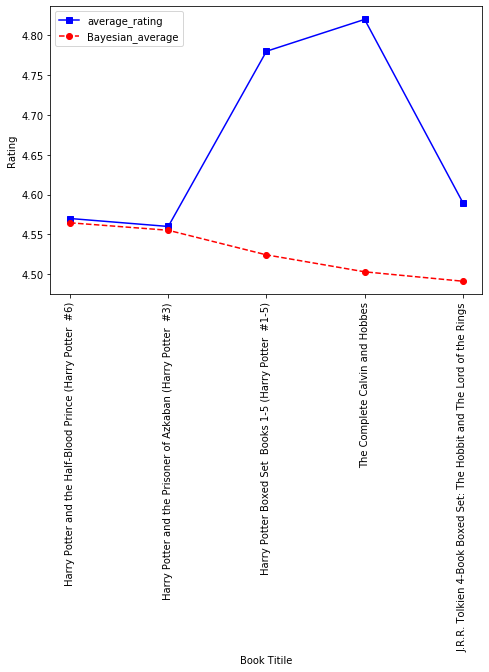

<Figure size 432x288 with 0 Axes>

In [7]:
# Generate a line graph between bayesian_average and average rating
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
y1=top5_high_rating['average_rating']
y2=top5_high_rating['Bayesian_average']
x=top5_high_rating['title']
l1=ax.plot(x,y1,'bs-')
l2=ax.plot(x,y2,'ro--')
ax.legend(labels=('average_rating','Bayesian_average'),loc='upper left')
plt.xticks(rotation=90)
ax.set_xlabel('Book Titile')
ax.set_ylabel('Rating')
plt.show()




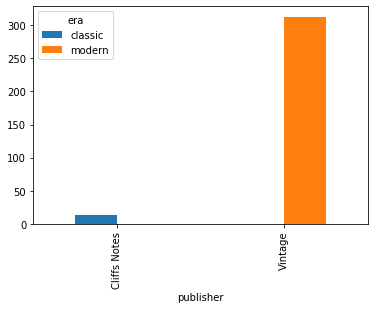

In [30]:
# Generate a graph for Top 5 publisher
pd.pivot_table(top_pub, values = 'count', index = 'publisher',
               columns = 'era',aggfunc ='sum').plot.bar()

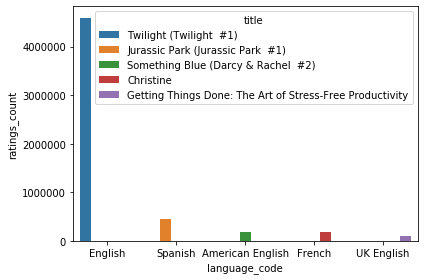

In [59]:
abbre={'eng':'English','spa':'Spanish','en-US':'American English','fre':'French','en-GB':'UK English'}
x=top5_high_rating_diff_lang['language_code'].map(abbre)
y=top5_high_rating_diff_lang['ratings_count']
h=hue=top5_high_rating_diff_lang['title']
sns.barplot(x,y,hue=h)
plt.tight_layout()
plt.show()